In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

In [2]:
data_np = pd.read_csv("datasets/spectra_forest_floor.csv")
data_np = data_np[(data_np['plot_ID'] != 'HY_PINE5') | (data_np['location'] != 15)]
class_labels = data_np["plot_ID"]
data_np = data_np.drop(columns=["plot_ID", "location"])
data_np = data_np.to_numpy()

In [3]:
data_np

array([[ 1.64393288e-02,  1.64742157e-02,  1.67021319e-02, ...,
         1.60803625e+00,  1.48152850e+00,  1.92000023e+00],
       [ 1.38413181e-02,  1.40290940e-02,  1.41673827e-02, ...,
         2.69828242e-01,  1.19795895e+00,  2.93990392e+00],
       [ 1.57151318e-02,  1.58642467e-02,  1.59525235e-02, ...,
         1.87115708e+00,  3.93370401e+00, -7.02670545e+01],
       ...,
       [ 1.43466929e-02,  1.44262352e-02,  1.45137135e-02, ...,
        -1.01630259e+01,  2.87106048e+01,  7.00539668e+00],
       [ 1.97327267e-02,  1.99505806e-02,  1.99579868e-02, ...,
        -3.87427912e-01, -1.38662758e+00, -3.73689524e+00],
       [ 1.58209227e-02,  1.56658762e-02,  1.57715695e-02, ...,
        -2.60718237e+00, -2.74665882e+00, -2.01420312e+00]])

In [4]:
scaler = StandardScaler()
data_np_scaled = scaler.fit_transform(data_np)

In [5]:
data_np_scaled

array([[ 3.82662588e-02,  5.17916198e-02,  9.30403644e-02, ...,
         3.39221793e-02,  5.24386075e-02,  8.90227159e-02],
       [-4.47262135e-01, -4.08661120e-01, -3.87547106e-01, ...,
         3.38783895e-02,  4.90982840e-02,  1.49385355e-01],
       [-9.70750646e-02, -6.30746044e-02, -4.90850992e-02, ...,
         3.39307893e-02,  8.13241473e-02, -4.18334259e+00],
       ...,
       [-3.52815328e-01, -3.33873532e-01, -3.21882920e-01, ...,
         3.35369989e-02,  3.73185048e-01,  3.90000106e-01],
       [ 6.53751866e-01,  7.06442774e-01,  7.10349198e-01, ...,
         3.38568824e-02,  1.86530012e-02, -2.45778642e-01],
       [-7.73043663e-02, -1.00430716e-01, -8.33939078e-02, ...,
         3.37842461e-02,  2.63243648e-03, -1.43821718e-01]])

In [6]:
# Reduce to desired number of components (e.g., 50)
pca = PCA(n_components=10)
data_np_scaled = data_np_scaled[:,:1000]
data_pca = pca.fit_transform(data_np_scaled)

# Explained variance to understand how much information is retained
print(pca.explained_variance_ratio_)

[6.32474400e-01 2.99994062e-01 3.00812146e-02 2.11619145e-02
 8.64406532e-03 2.52832883e-03 1.15362628e-03 1.06944748e-03
 5.34489757e-04 4.63270598e-04]


In [7]:
data_pca

array([[-12.13149481,  13.55248953,   3.73637746, ...,  -0.25496339,
          0.13053477,   0.69354673],
       [-28.57179124,  11.39372647,  14.54494917, ...,   0.19606979,
          1.33438945,   1.58096135],
       [ -0.306055  ,   7.61239215,   2.41218307, ...,   0.06238056,
          0.33771093,   0.87343937],
       ...,
       [-15.02673973,  -4.63031788,  -4.13954012, ...,   1.16788262,
          0.32138252,   0.32165831],
       [ 21.53791363,  -2.07321618,  -6.0629071 , ...,   1.47478491,
          0.3003074 ,   0.42410716],
       [-23.07307996,  -5.65142235,  -6.15371902, ...,   0.56242324,
         -0.06269222,  -0.03711459]])

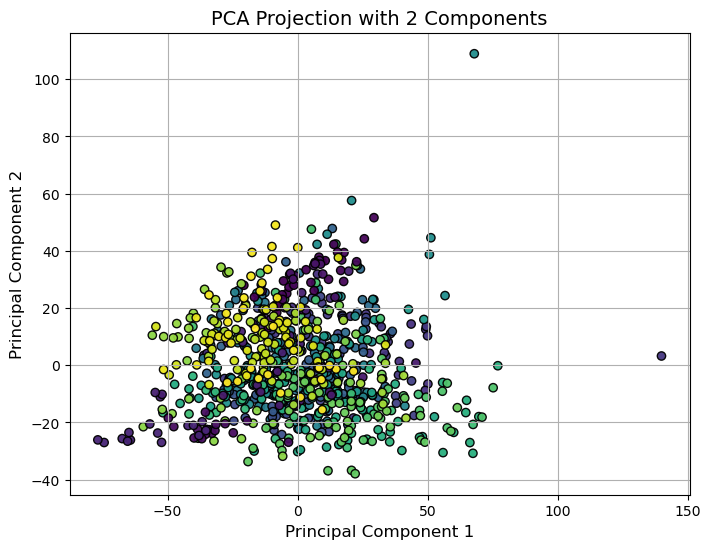

In [11]:
pca_plot = PCA(n_components=2)
data_pca_plot = pca.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_pca_plot[:, 0], data_pca_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('PCA Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/1000_wavelength_pca_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df = pd.DataFrame(data_pca)
df.to_csv('datasets/1000_wavelength_10features_pca.csv', index=False)

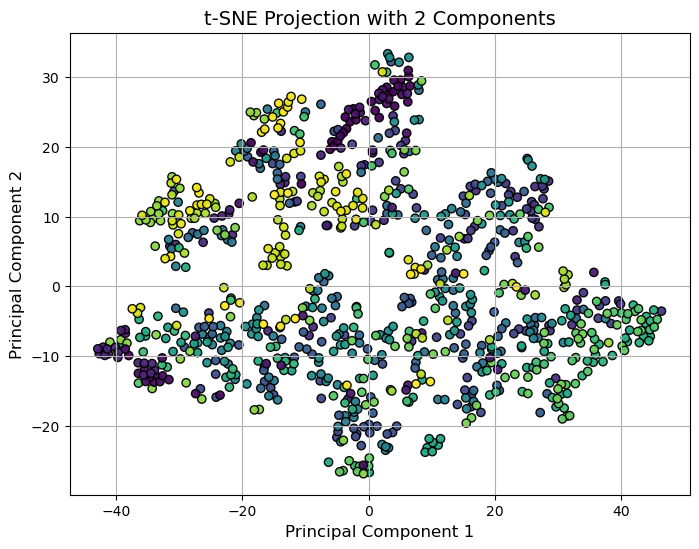

In [12]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne_plot = tsne.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_tsne_plot[:, 0], data_tsne_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('t-SNE Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/1000_wavelength_tsne_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
agglo = FeatureAgglomeration(n_clusters=10)
data_agglo = agglo.fit_transform(data_np_scaled)
df = pd.DataFrame(data_agglo)
df.to_csv('datasets/1000_wavelength_10features_data_agglo.csv', index=False)

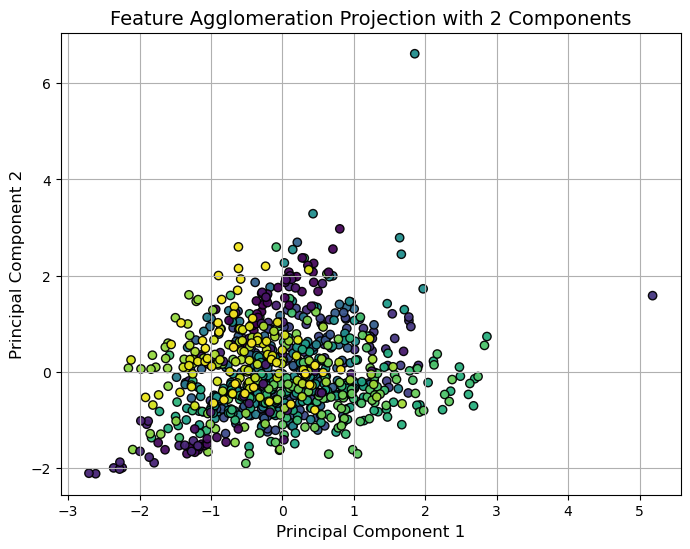

In [14]:
agglo = FeatureAgglomeration(n_clusters=2)
data_agglo_plot = agglo.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
# class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_agglo_plot[:, 0], data_agglo_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('Feature Agglomeration Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('plots/1000_wavelength_feature_agglomeration.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/46/l0nkbr7d77l8hz99pt_bwlqh0000gn/T/ipykernel_38053/440927101.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_tsne_plot[idx, 0], data_tsne_plot[idx, 1],
/var/folders/46/l0nkbr7d77l8hz99pt_bwlqh0000gn/T/ipykernel_38053/440927101.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('2').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_tsne_plot[idx, 0], data_tsne_plot[idx, 1],
/var/folders/46/l0nkbr7d77l8hz99pt_bwlqh0000gn/T/ipykernel_38053/440927101.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('3').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_tsne_plot[idx, 0], data_tsne_plot[idx, 1],
/

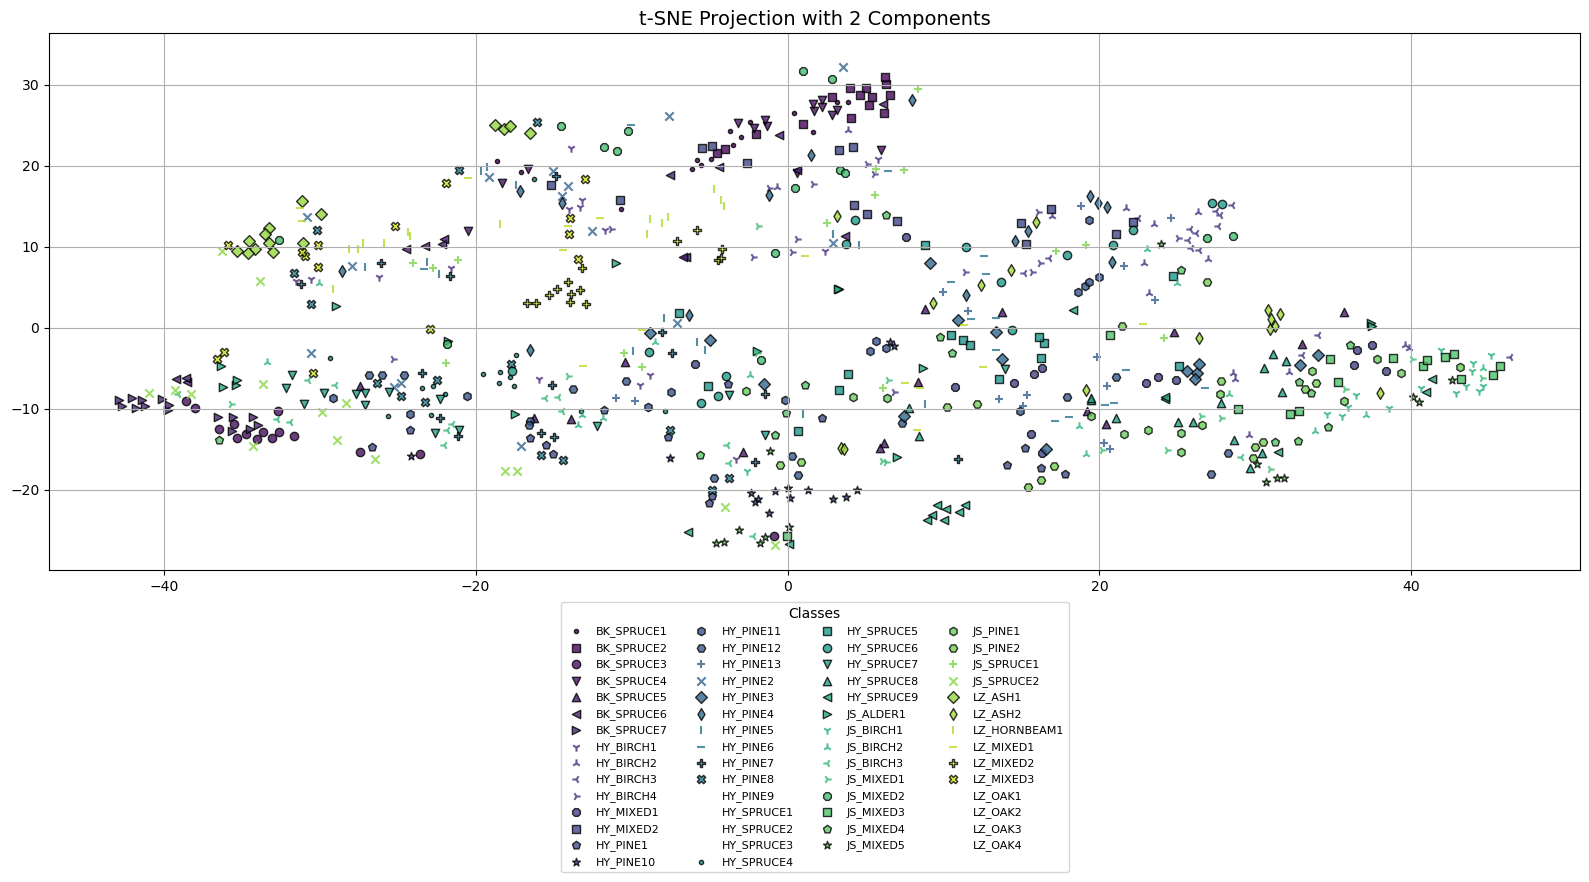

In [15]:
# Plot each class with a unique marker and color
plt.figure(figsize=(16, 9))

unique_classes = np.unique(class_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors for each class
markers = [m for m in MarkerStyle.markers.keys() if isinstance(m, str)]

for i, class_name in enumerate(unique_classes):  # Use actual class names
    idx = np.where(class_labels == class_name)[0]  # Match by original class names
    marker = markers[i % len(markers)]  # Cycle through markers
    plt.scatter(data_tsne_plot[idx, 0], data_tsne_plot[idx, 1],
                color=[colors[i]], marker=marker,
                label=class_name,  # Use class name for legend
                alpha=0.8, edgecolor='k')

# Add labels, title, and legend
plt.title('t-SNE Projection with 2 Components', fontsize=14)
# Place legend below the plot
plt.legend(title='Classes', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=4, fontsize=8, title_fontsize=10)  # ncol adjusts the number of columns

plt.grid(True)
plt.tight_layout()

# Save and display the plot
plt.savefig('plots/1000_wavelength_tsne_plot_shapes.png', dpi=300, bbox_inches='tight')
plt.show()